<a href="https://colab.research.google.com/github/samarjithMnagesha/pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import time
stat_time=time.time()

In [44]:
#Converts image into tensor of 4D(height,images,widgth,clolr)
transform=transforms.ToTensor()

In [45]:
#Train data
train_data=datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform)

In [46]:
#test_data
test_data=datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

In [47]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [48]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [49]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=False)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [50]:
#defind CNN Model
conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1,padding=1)
conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1,padding=1)

In [51]:
for i,(X_train,y_train) in enumerate(train_loader):
  break

In [52]:
X_train.shape

torch.Size([10, 1, 28, 28])

In [53]:
x=F.relu(conv1(X_train))

In [54]:
x.shape

torch.Size([10, 6, 28, 28])

In [55]:
x=F.max_pool2d(x,2,2)

In [56]:
x.shape

torch.Size([10, 6, 14, 14])

In [57]:
x=F.relu(conv2(x))

In [58]:
x.shape

torch.Size([10, 16, 14, 14])

In [59]:
x=F.max_pool2d(x,2,2)

In [60]:
x.shape

torch.Size([10, 16, 7, 7])

In [61]:
#Model class
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.fc1=nn.Linear(7*7*16,120) # Changed from 5*5*16 to 7*7*16
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=F.max_pool2d(x,2,2)
    x=F.relu(self.conv2(x))
    x=F.max_pool2d(x,2,2)
    x=x.view(-1,7*7*16) # Changed from 5*5*16 to 7*7*16
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return F.log_softmax(x,dim=1)

In [62]:
ceriterian=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [63]:
torch.manual_seed(12)
model=CNNModel()
echops=5
train_loss=[]
test_loss=[]
train_correct=[]
test_correct=[]

for i in range(echops):
  trn_c=0
  tst_c=0
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred=model(X_train)
    loss=ceriterian(y_pred,y_train)
    predicted=torch.max(y_pred.data,1)[1]
    batch_correct=(predicted==y_train).sum()
    trn_c+=batch_correct
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600==0:
      print(f'Epoch:{i} Batch: {b} Loss:{loss.item()}')
  train_loss.append(loss.item())
  train_correct.append(trn_c)
#test
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val=model(X_test)
      loss=ceriterian(y_val,y_test)
      predicted=torch.max(y_val.data,1)[1]
      batch_correct=(predicted==y_test).sum()
    tst_c+=batch_correct
    test_loss.append(loss.item())
    test_correct.append(tst_c)


Current_time=time.time()
total=Current_time-stat_time
print(f'Training  took :{total/60} minutes!')


Epoch:0 Batch: 600 Loss:2.3046226501464844
Epoch:0 Batch: 1200 Loss:2.317166566848755
Epoch:0 Batch: 1800 Loss:2.326042652130127
Epoch:0 Batch: 2400 Loss:2.3219289779663086
Epoch:0 Batch: 3000 Loss:2.3064987659454346
Epoch:0 Batch: 3600 Loss:2.3203654289245605
Epoch:0 Batch: 4200 Loss:2.292628526687622
Epoch:0 Batch: 4800 Loss:2.3022994995117188
Epoch:0 Batch: 5400 Loss:2.316307544708252
Epoch:0 Batch: 6000 Loss:2.324106216430664
Epoch:1 Batch: 600 Loss:2.3046226501464844
Epoch:1 Batch: 1200 Loss:2.317166566848755
Epoch:1 Batch: 1800 Loss:2.326042652130127
Epoch:1 Batch: 2400 Loss:2.3219289779663086
Epoch:1 Batch: 3000 Loss:2.3064987659454346
Epoch:1 Batch: 3600 Loss:2.3203654289245605
Epoch:1 Batch: 4200 Loss:2.292628526687622
Epoch:1 Batch: 4800 Loss:2.3022994995117188
Epoch:1 Batch: 5400 Loss:2.316307544708252
Epoch:1 Batch: 6000 Loss:2.324106216430664
Epoch:2 Batch: 600 Loss:2.3046226501464844
Epoch:2 Batch: 1200 Loss:2.317166566848755
Epoch:2 Batch: 1800 Loss:2.326042652130127
Epo

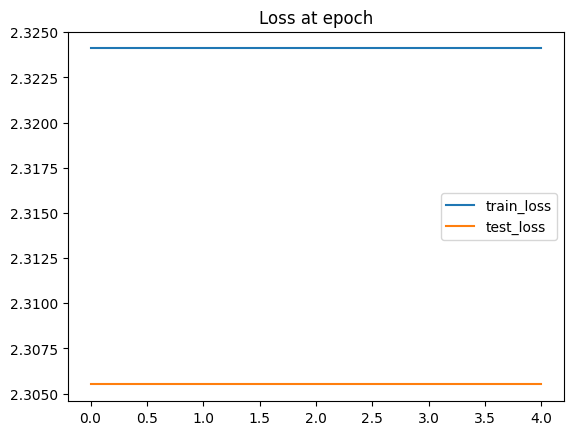

In [64]:
train_loss=np.array(train_loss)
test_loss=np.array(test_loss)
train_correct=np.array(train_correct)
test_correct=np.array(test_correct)
plt.plot(train_loss,label='train_loss')
plt.plot(test_loss,label='test_loss')
plt.title('Loss at epoch')
plt.legend()

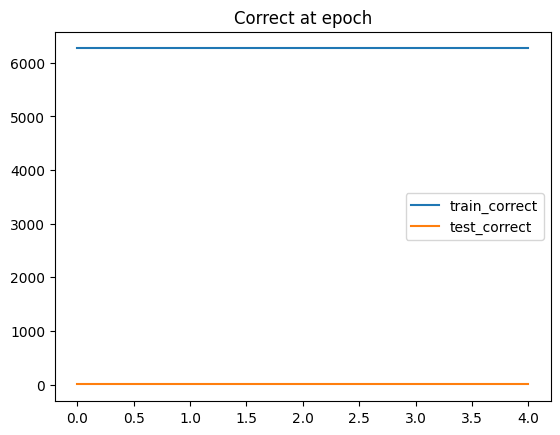

In [65]:
plt.plot(train_correct,label='train_correct')
plt.plot(test_correct,label='test_correct')
plt.title('Correct at epoch')
plt.legend()

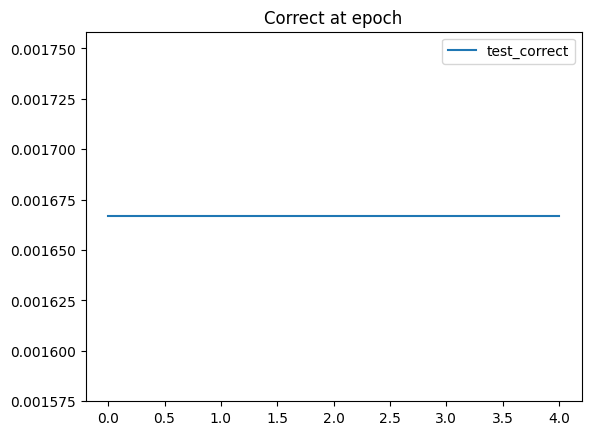

In [66]:
plt.plot([t/600 for t in test_correct],label='test_correct')
plt.title('Correct at epoch')
plt.legend()

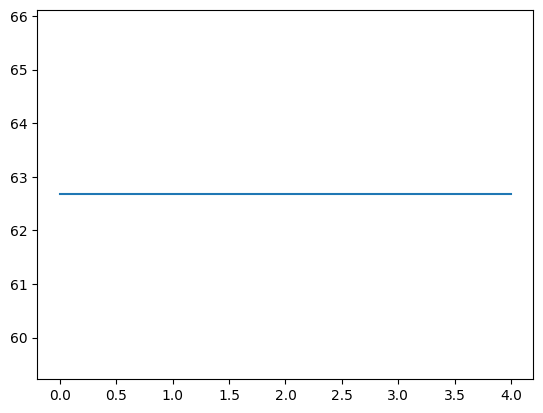

In [67]:
plt.plot([t/100 for t in train_correct])

In [72]:
test_data[3745]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

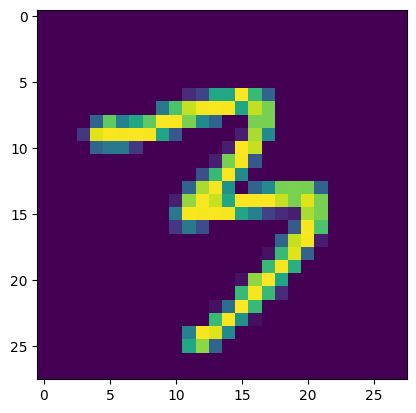

In [75]:
plt.imshow(test_data[3746][0].reshape(28,28))

In [78]:
model.eval()
with torch.no_grad():
  new_predict=model(test_data[3745][0].reshape(1,1,28,28))


In [79]:
new_predict.argmax()

tensor(7)